In [27]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import estimate_bandwidth, MeanShift, DBSCAN
%matplotlib inline

In [28]:
df = pd.read_csv('./data/ffffinal_data.csv', encoding='cp949')
df.head()

,Unnamed: 0,동,전체산업,소매업_자동차_제외_사업체수,숙박_음식점업_사업체수,학교수,학원수,소매업_자동차_제외_종사자수,숙박_음식점업_종사자수,총인구_합계,...,20대이하,20대,30대,40대,50대,60대,유동인구,자전거도로갯수,관광지개수,버스정류장 개수
0,2,동서학동,447,81,80,2,15,163,210,6784,...,2216.416667,4222.581667,6660.898333,9821.903333,11430.505000,14956.531670,5999.111010,6,0.0,12
1,3,서서학동,512,92,67,0,12,147,114,9223,...,1776.725000,2406.133333,3339.381667,4809.505000,5222.346667,8052.013333,3123.260243,2,1.0,8
2,4,중화산1동,926,172,262,6,42,518,921,15288,...,7063.136667,12580.656670,13598.373330,18024.130000,17729.248330,23538.330000,13356.879790,3,0.0,11
3,5,중화산2동,"2,629",353,499,2,222,834,"1,545",20030,...,9930.943333,16559.766670,20152.223330,27694.336670,24293.525000,22298.698330,18584.475600,6,0.0,13
4,6,평화1동,658,112,103,3,15,266,256,13204,...,2783.241667,3508.723333,4878.001667,6770.443333,7082.258333,8944.766667,4435.466860,5,0.0,6


In [29]:
df = df.drop(['Unnamed: 0','관광지개수','한국인_세대수'], axis=1)
df.columns

Index(['동', '전체산업', '소매업_자동차_제외_사업체수', '숙박_음식점업_사업체수', '학교수', '학원수',
       '소매업_자동차_제외_종사자수', '숙박_음식점업_종사자수', '총인구_합계', '하천', '20대이하', '20대',
       '30대', '40대', '50대', '60대', '유동인구', '자전거도로갯수', '버스정류장 개수'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   동                35 non-null     object 
 1   전체산업             35 non-null     object 
 2   소매업_자동차_제외_사업체수  35 non-null     object 
 3   숙박_음식점업_사업체수     35 non-null     int64  
 4   학교수              35 non-null     int64  
 5   학원수              35 non-null     int64  
 6   소매업_자동차_제외_종사자수  35 non-null     object 
 7   숙박_음식점업_종사자수     35 non-null     object 
 8   총인구_합계           35 non-null     int64  
 9   하천               35 non-null     int64  
 10  20대이하            35 non-null     float64
 11  20대              35 non-null     float64
 12  30대              35 non-null     float64
 13  40대              35 non-null     float64
 14  50대              35 non-null     float64
 15  60대              35 non-null     float64
 16  유동인구             35 non-null     float64
 17  자전거도로갯수          3

#### numeric화

In [31]:
df_col = ['전체산업','소매업_자동차_제외_사업체수','소매업_자동차_제외_종사자수','숙박_음식점업_종사자수']

for col in df_col:
    for i in range(len(df)):
        df[col][i]= df[col][i].strip().replace(",","")
        

<ipython-input-31-0a5d5d661ffc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i]= df[col][i].strip().replace(",","")


In [32]:
df1 = df.iloc[:,1:].apply(pd.to_numeric)

In [33]:
df.iloc[:,1:]

,전체산업,소매업_자동차_제외_사업체수,숙박_음식점업_사업체수,학교수,학원수,소매업_자동차_제외_종사자수,숙박_음식점업_종사자수,총인구_합계,하천,20대이하,20대,30대,40대,50대,60대,유동인구,자전거도로갯수,버스정류장 개수
0,447,81,80,2,15,163,210,6784,0,2216.416667,4222.581667,6660.898333,9821.903333,11430.505000,14956.531670,5999.111010,6,12
1,512,92,67,0,12,147,114,9223,0,1776.725000,2406.133333,3339.381667,4809.505000,5222.346667,8052.013333,3123.260243,2,8
2,926,172,262,6,42,518,921,15288,1,7063.136667,12580.656670,13598.373330,18024.130000,17729.248330,23538.330000,13356.879790,3,11
3,2629,353,499,2,222,834,1545,20030,1,9930.943333,16559.766670,20152.223330,27694.336670,24293.525000,22298.698330,18584.475600,6,13
4,658,112,103,3,15,266,256,13204,0,2783.241667,3508.723333,4878.001667,6770.443333,7082.258333,8944.766667,4435.466860,5,6
5,2404,411,387,2,211,1160,1192,46295,1,21018.433330,20923.298330,30533.113330,43817.755000,40550.925000,48320.566670,27204.332270,5,23
6,3287,842,585,3,263,2653,1720,40408,1,13822.496670,23613.738330,30008.220000,42011.338330,38277.865000,35784.343330,27458.286170,6,36
7,998,121,92,0,29,224,184,12799,1,3264.638333,3902.166667,5044.966667,7041.133333,6804.763333,8173.196667,4674.016499,2,8
8,1045,273,212,1,47,554,506,14447,1,5304.563333,5724.433333,7027.961667,10368.700000,9878.655000,11976.565000,6776.238215,5,14
9,1227,173,231,5,105,618,739,23323,0,14266.081670,13183.676670,21911.456670,32869.018330,33304.173330,31027.470000,19026.216290,5,19


#### 결측값 확인

In [34]:
df.isna().sum()

동                  0
전체산업               0
소매업_자동차_제외_사업체수    0
숙박_음식점업_사업체수       0
학교수                0
학원수                0
소매업_자동차_제외_종사자수    0
숙박_음식점업_종사자수       0
총인구_합계             0
하천                 0
20대이하              0
20대                0
30대                0
40대                0
50대                0
60대                0
유동인구               0
자전거도로갯수            0
버스정류장 개수           0
dtype: int64

In [35]:
df = df.fillna(0)

## 차원 축소

In [36]:
# 스케일링
df_scaled = StandardScaler().fit_transform(df.iloc[:,1:])

In [37]:
# PCA 변환
pca = PCA(n_components=2)
pca.fit(df_scaled)
pca_trans = pca.transform(df_scaled)
print(pca_trans.shape)

(35, 2)


In [38]:
print(pca.explained_variance_ratio_)

[0.62056602 0.13402479]


**=> PCA 요소 두개로 기존 데이터를 75%정도 설명할 수 있음**

In [39]:
# SVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(df_scaled)
tsvd_trans = tsvd.transform(df_scaled)
print(tsvd_trans.shape)

(35, 2)


In [40]:
print(tsvd.explained_variance_ratio_)

[0.62056602 0.13402479]


**=> 같은 결과**

In [41]:
# 데이터프레임으로 변환

pca_columns = ['pca_1','pca_2']
df_pca = pd.DataFrame(pca_trans, columns=pca_columns)
df_pca.head()

,pca_1,pca_2
0,-3.363625,-0.888130
1,-4.475186,-0.135838
2,-0.902530,-0.259320
3,1.987462,0.979158
4,-3.632527,-0.278522


In [42]:
# '동' 칼럼과 붙이기
data = pd.concat([df['동'],df_pca], axis=1)
data.shape

(35, 3)

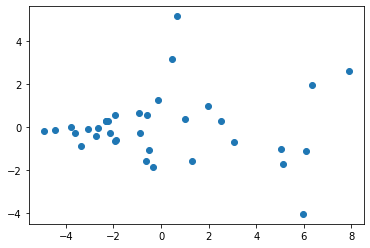

In [43]:
plt.scatter(data['pca_1'], data['pca_2'])

## 군집화

#### '동' 칼럼을 인덱스로 변경

In [44]:
jj_df = data.set_index("동")
jj_df.head()

,pca_1,pca_2
동,,
동서학동,-3.363625,-0.888130
서서학동,-4.475186,-0.135838
중화산1동,-0.902530,-0.259320
중화산2동,1.987462,0.979158
평화1동,-3.632527,-0.278522


#### Mean Shift

In [45]:
# 최적의 bandwidth 찾기
bandwidth = estimate_bandwidth(jj_df)
bandwidth

2.6171448046927654

In [46]:
meanshift = MeanShift(bandwidth=2.8)
cluster_labels = meanshift.fit_predict(jj_df)
np.unique(cluster_labels)

array([0, 1, 2, 3, 4])

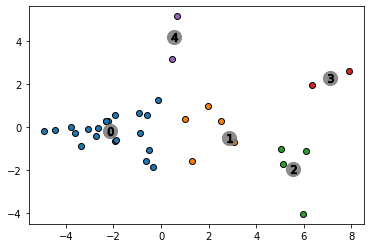

In [47]:
jj_df['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
# markers=['o', 's', '^', 'x']

for label in unique_labels:
    label_cluster = jj_df[jj_df['meanshift_label']==label]
    center_x_y = centers[label]
    
    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['pca_1'], y=label_cluster['pca_2'], edgecolor='k') #, marker=markers[label] 
    
    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9) #, marker=markers[label]
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
plt.show()

#### DBSCAN

In [25]:
dbscan = DBSCAN(eps=0.8, min_samples=2, metric='euclidean')
dbscan_labels = dbscan.fit_predict(jj_df)

jj_df['dbscan_label'] = dbscan_labels
np.unique(dbscan_labels)

array([-1,  0,  1,  2,  3])

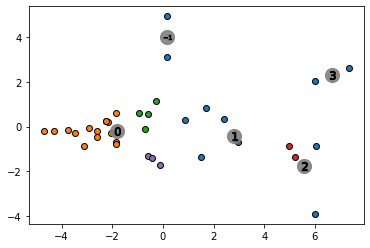

In [26]:
#centers = dbscan.cluster_centers_
unique_labels = np.unique(dbscan_labels)
# markers=['o', 's', '^', 'x']

for label in unique_labels:
    label_cluster = jj_df[jj_df['dbscan_label']==label]
    center_x_y = centers[label]
    
    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['pca_1'], y=label_cluster['pca_2'], edgecolor='k') #, marker=markers[label] 
    
    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9) #, marker=markers[label]
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
plt.show()